In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [53]:
movieDataWithNA = pd.read_csv('top-500-movies.csv')
movieDataWithNA.head()

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year,percentage_domestic,percentage_worldwide
0,1,23/4/2019,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0,214.59,699.45
1,2,20/5/2011,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Ti...,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0,63.61,275.91
2,3,22/4/2015,Avengers: Age of Ultron,/movie/Avengers-Age-of-Ultron#tab=summary,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0,125.76,382.28
3,4,16/12/2015,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0,306.10,674.71
4,5,25/4/2018,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0,226.27,682.79


In [54]:
movieData = movieDataWithNA.dropna()
# to remove rows that contain NULL values

In [55]:
production_cost = pd.DataFrame(movieData['production_cost'])
worldwide_gross = pd.DataFrame(movieData['worldwide_gross'])
runtime = pd.DataFrame(movieData['runtime'])



In [73]:
movieNumData = pd.DataFrame(movieData[['production_cost', 'worldwide_gross','runtime']])
movieNumData.head(15)


,production_cost,worldwide_gross,runtime
0,400000000,2797800564,181.0
1,379000000,1045713802,136.0
2,365000000,1395316979,141.0
3,306000000,2064615817,136.0
4,300000000,2048359754,156.0
5,300000000,960996492,167.0
6,300000000,655945209,121.0
7,300000000,879500760,148.0
9,275000000,1072848487,142.0
10,275000000,393151347,135.0


In [74]:
movieNumData.describe()

,production_cost,worldwide_gross,runtime
count,4.740000e+02,4.740000e+02,474.000000
mean,1.496945e+08,4.881262e+08,121.683544
std,4.785305e+07,3.834185e+08,22.274310
min,9.100000e+07,2.391136e+07,76.000000
25%,1.100000e+08,2.276246e+08,104.000000
50%,1.400000e+08,3.778758e+08,120.000000
75%,1.750000e+08,6.524903e+08,135.000000
max,4.000000e+08,2.910371e+09,201.000000


<AxesSubplot:>

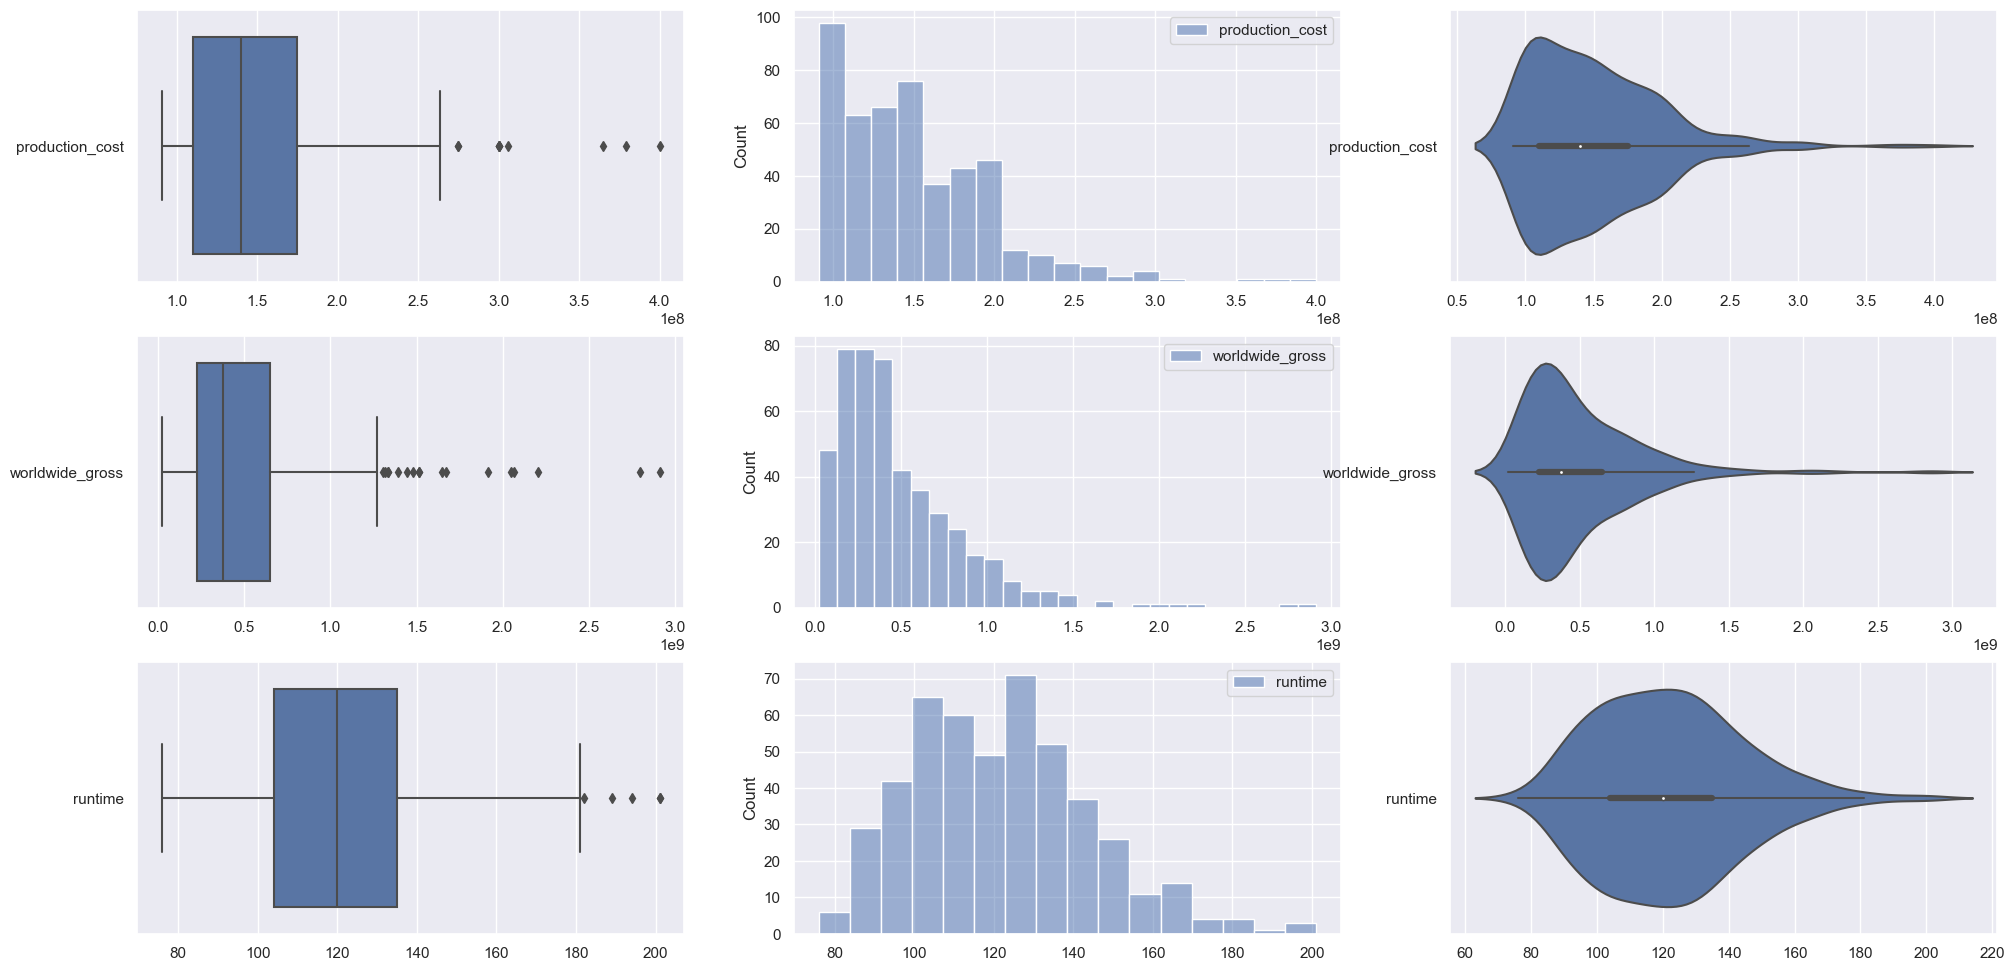

In [78]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for production_cost
sb.boxplot(data = production_cost, orient = "h", ax = axes[0,0])
sb.histplot(data = production_cost, ax = axes[0,1])
sb.violinplot(data = production_cost, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for percentage_worldwide
sb.boxplot(data = worldwide_gross, orient = "h", ax = axes[1,0])
sb.histplot(data = worldwide_gross, ax = axes[1,1])
sb.violinplot(data = worldwide_gross, orient = "h", ax = axes[1,2])

# Plot the basic uni-variate figures for percentage_domestic
sb.boxplot(data = runtime, orient = "h", ax = axes[2,0])
sb.histplot(data = runtime, ax = axes[2,1])
sb.violinplot(data = runtime, orient = "h", ax = axes[2,2])

In [7]:
# Calculate the quartiles
Q1 = production_cost.quantile(0.25)
Q3 = production_cost.quantile(0.75)

# Rule to identify outliers
rule = ((production_cost < (Q1 - 1.5 * (Q3 - Q1))) | (production_cost > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

production_cost    11
dtype: int64

In [8]:
# Calculate the quartiles
Q1 = worldwide_gross.quantile(0.25)
Q3 = worldwide_gross.quantile(0.75)

# Rule to identify outliers
rule = ((worldwide_gross < (Q1 - 1.5 * (Q3 - Q1))) | (worldwide_gross > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

worldwide_gross    17
dtype: int64

In [79]:
movieNumData.skew()

production_cost    1.401395
worldwide_gross    2.111328
runtime            0.571772
dtype: float64

,production_cost,worldwide_gross
production_cost,1.000000,0.537454
worldwide_gross,0.537454,1.000000


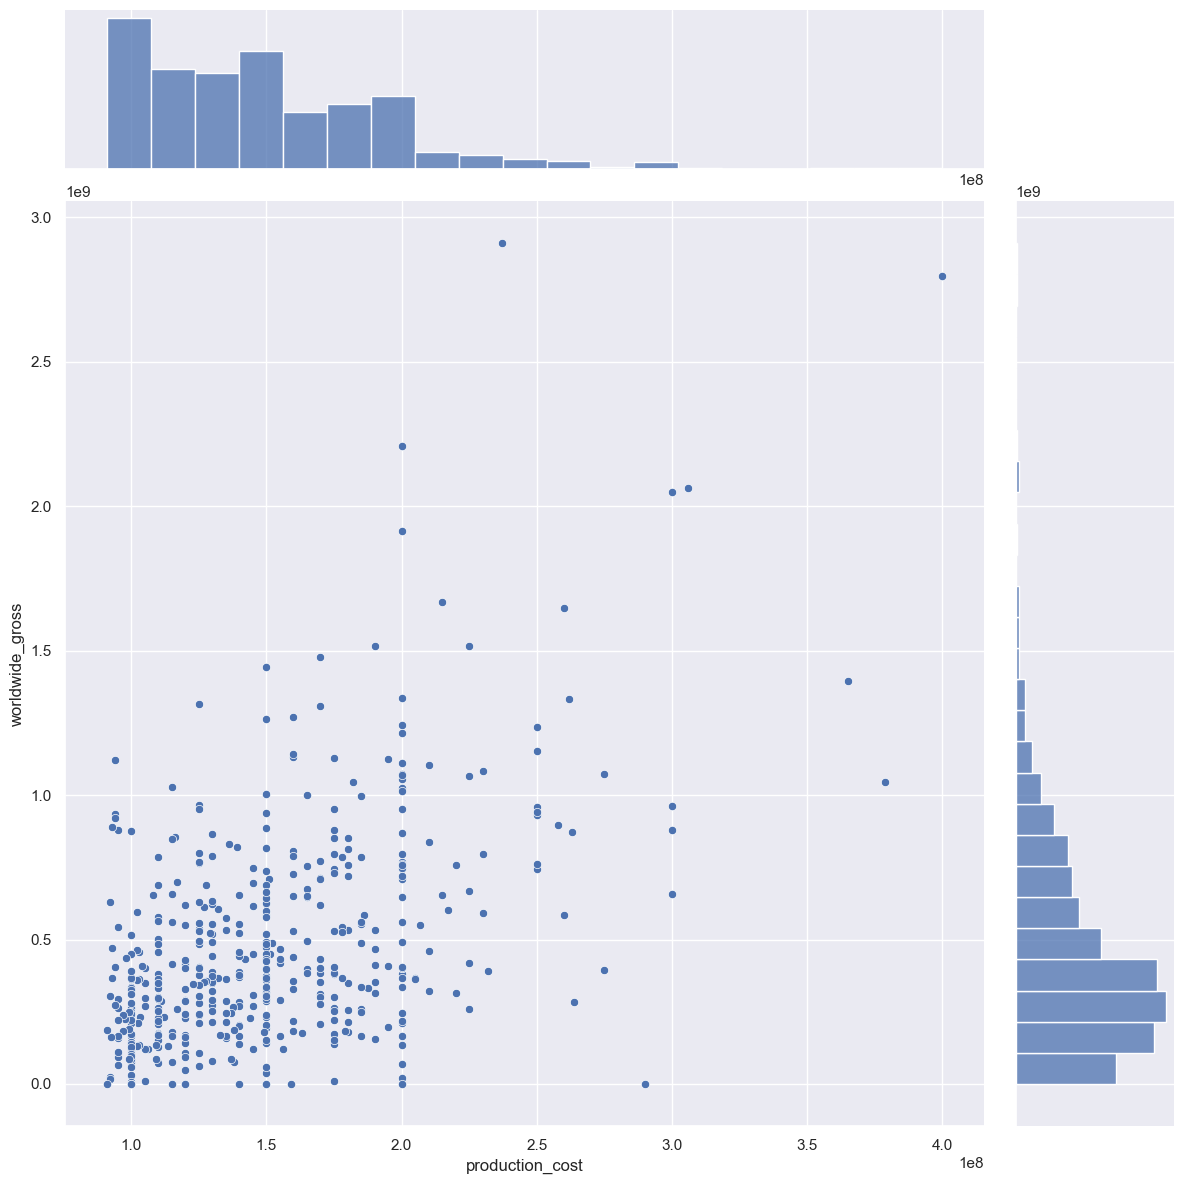

In [10]:
jointDFworldwide = pd.concat([production_cost, worldwide_gross], axis = 1).reindex(worldwide_gross.index)
jointDFworldwide
sb.jointplot(data = jointDFworldwide, x = "production_cost", y = "worldwide_gross", height = 12)
jointDFworldwide.corr()



<AxesSubplot:>

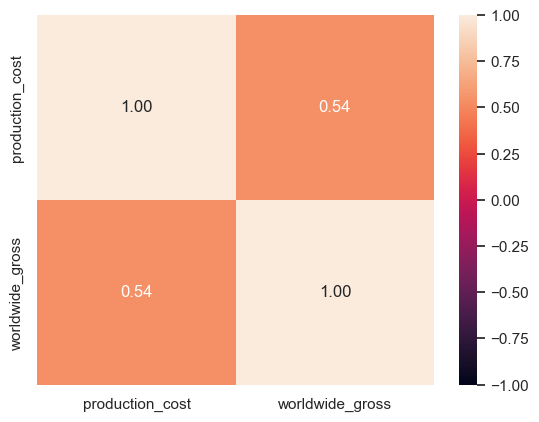

In [11]:
sb.heatmap(jointDFworldwide.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [13]:
#jointDFruntime = pd.concat([production_cost, runtime], axis = 1).reindex(runtime.index)
#jointDFruntime
#sb.jointplot(data = jointDFruntime, x = "production_cost", y = "runtime", height = 20)
#jointDFruntime.corr()

In [14]:
movieCatData = pd.DataFrame(movieData[['genre', 'mpaa']])
movieCatData.head()

,genre,mpaa
0,Action,PG-13
1,Adventure,PG-13
2,Action,PG-13
3,Adventure,PG-13
4,Action,PG-13


In [15]:
movieCatData = movieCatData.astype('category')

In [16]:
movieCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   genre   495 non-null    category
 1   mpaa    492 non-null    category
dtypes: category(2)
memory usage: 1.7 KB


In [17]:
movieCatData.describe()

,genre,mpaa
count,495,492
unique,10,5
top,Adventure,PG-13
freq,213,287


In [18]:
movieCatData["genre"].nunique()

10

In [19]:
movieCatData["genre"].value_counts()

Adventure            213
Action               202
Drama                 26
Thriller/Suspense     24
Comedy                11
Musical                8
Black Comedy           3
Horror                 3
Western                3
Romantic Comedy        2
Name: genre, dtype: int64

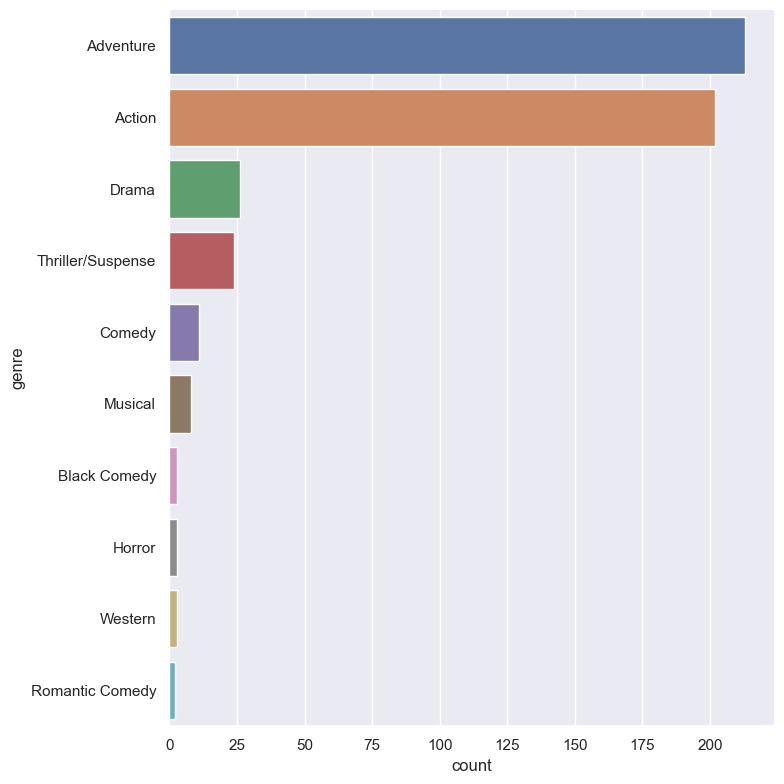

In [20]:
sb.catplot(y = 'genre', data = movieCatData, 
           kind = "count", 
           height = 8, 
           order = movieCatData['genre'].value_counts().index)

In [21]:
movieCatData["mpaa"].nunique()

5

In [22]:
movieCatData["mpaa"].value_counts()

PG-13      287
PG         124
R           63
G           17
Unrated      1
Name: mpaa, dtype: int64

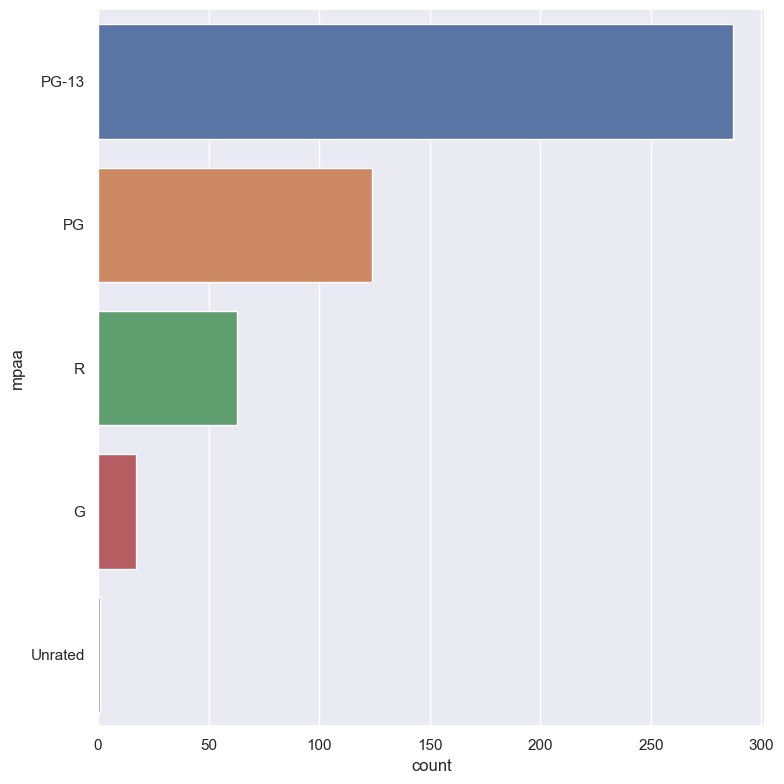

In [23]:
sb.catplot(y = 'mpaa', data = movieCatData, 
           kind = "count", 
           height = 8, 
           order = movieCatData['mpaa'].value_counts().index)

In [24]:
movieCatData = pd.concat([movieCatData, movieData["worldwide_gross"]], axis = 1).reindex(movieCatData.index)
movieCatData.head()

,genre,mpaa,worldwide_gross
0,Action,PG-13,2797800564
1,Adventure,PG-13,1045713802
2,Action,PG-13,1395316979
3,Adventure,PG-13,2064615817
4,Action,PG-13,2048359754


<AxesSubplot:xlabel='genre', ylabel='worldwide_gross'>

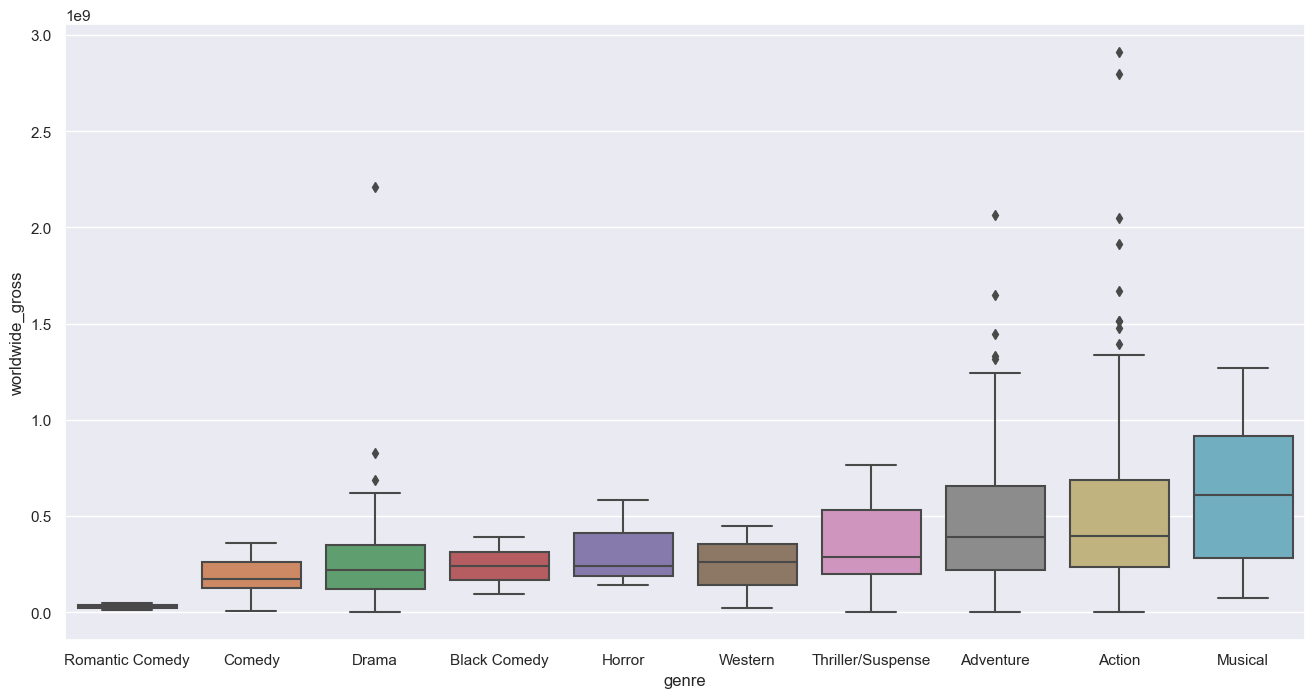

In [25]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'genre', y = 'worldwide_gross', data = movieCatData,
           order = movieCatData.groupby('genre')['worldwide_gross'].median().sort_values().index)

<AxesSubplot:xlabel='mpaa', ylabel='worldwide_gross'>

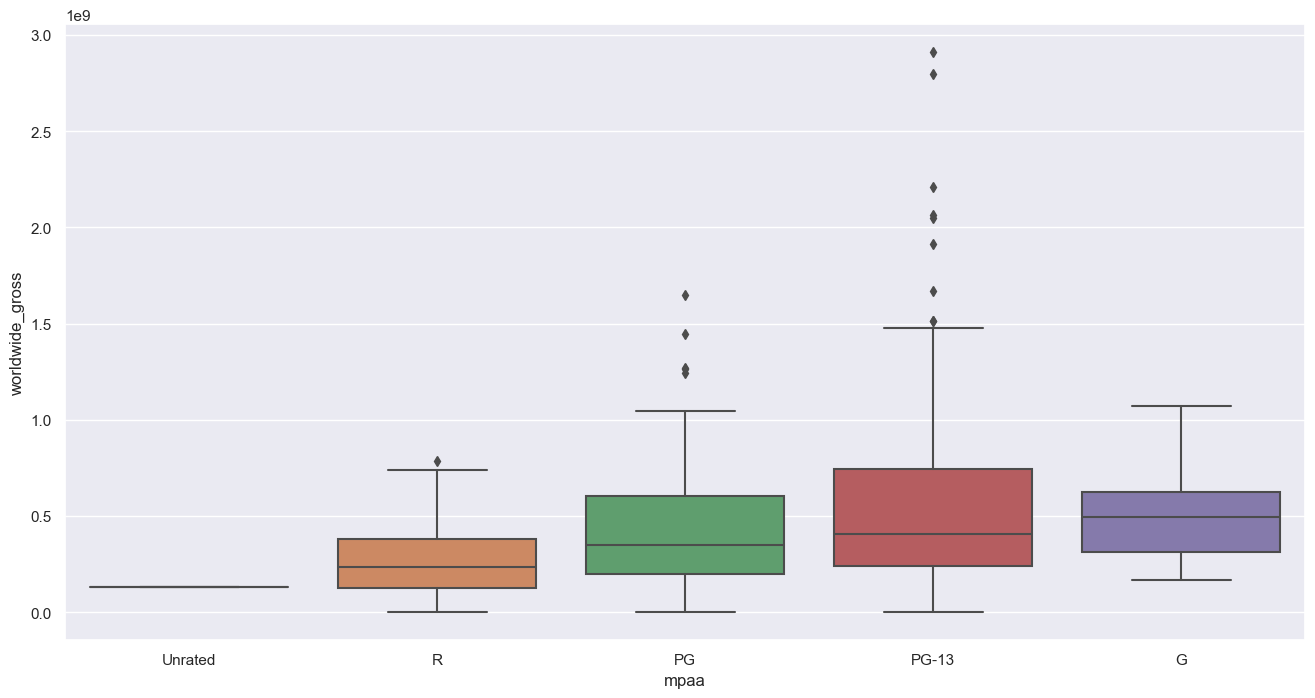

In [26]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mpaa', y = 'worldwide_gross', data = movieCatData,
           order = movieCatData.groupby('mpaa')['worldwide_gross'].median().sort_values().index)

Intercept of Regression 	: b =  [-2.13700476e+08]
Coefficients of Regression 	: a =  [[4.70584762]]

Intercept of Regression 	: b =  [-2.08997124e+08]
Coefficients of Regression 	: a =  [[5767790.51242821]]



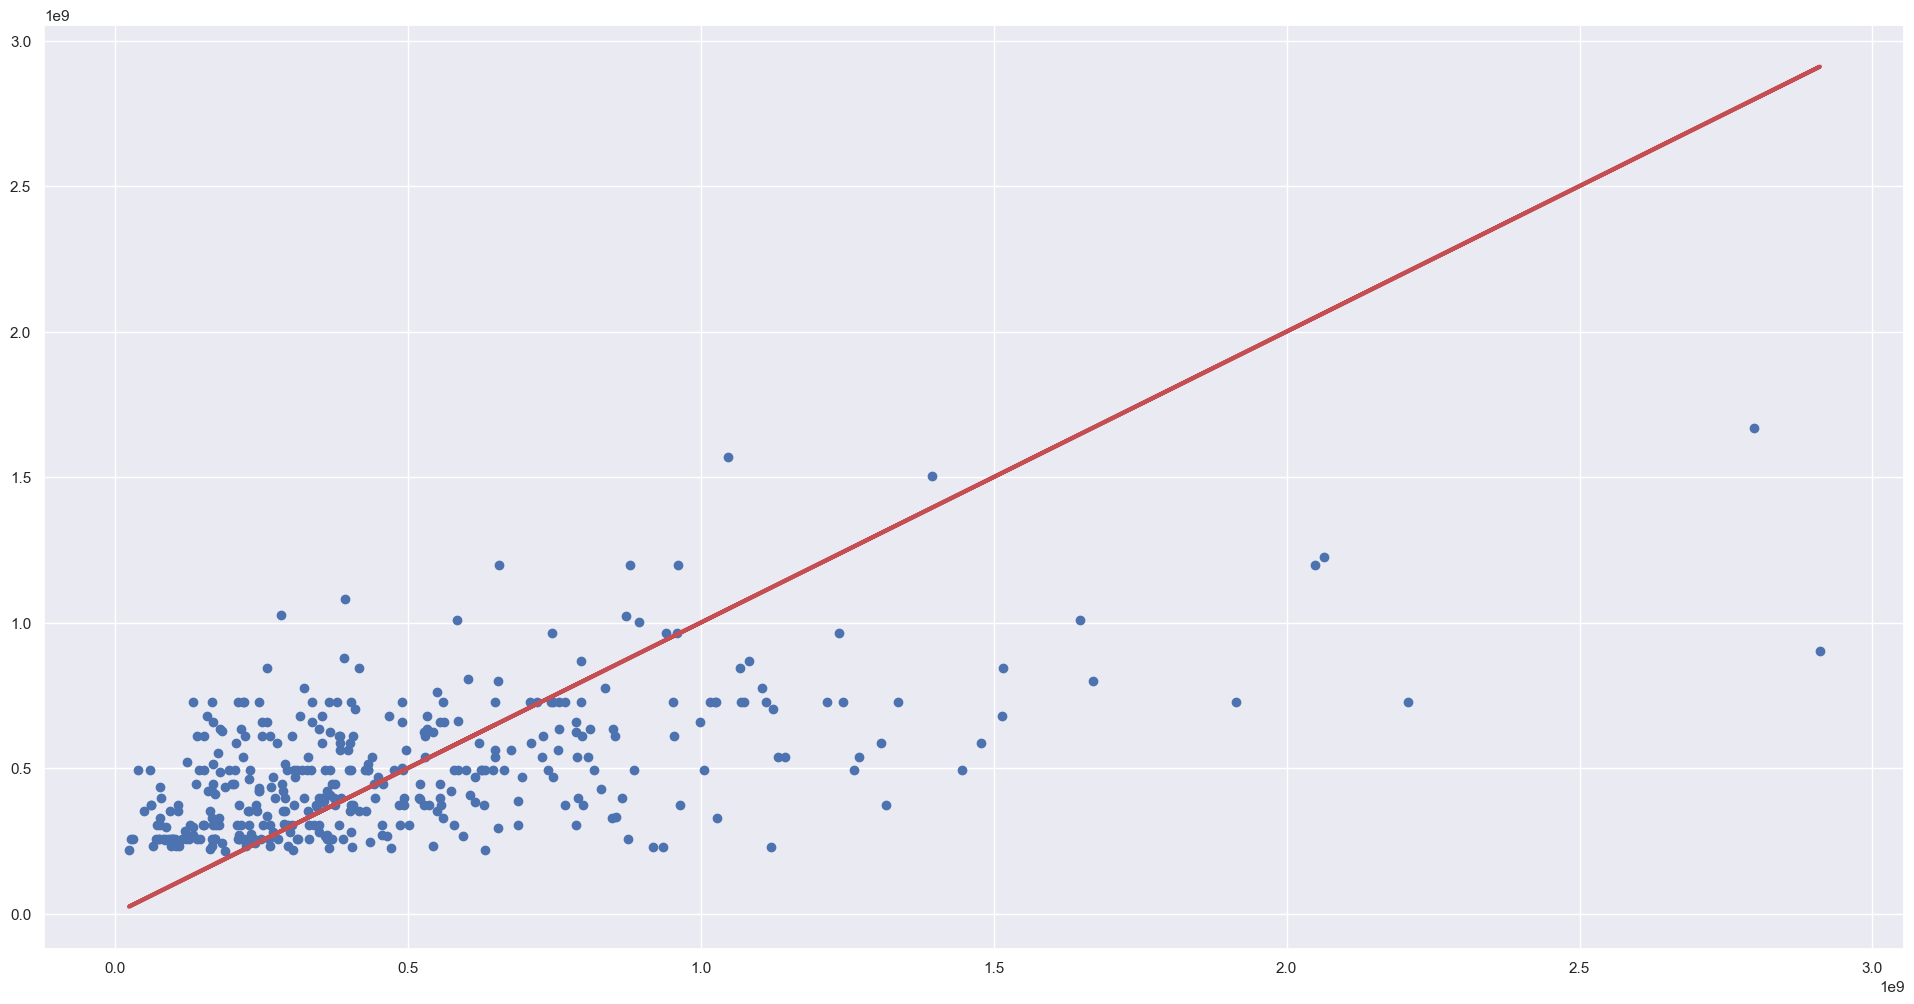

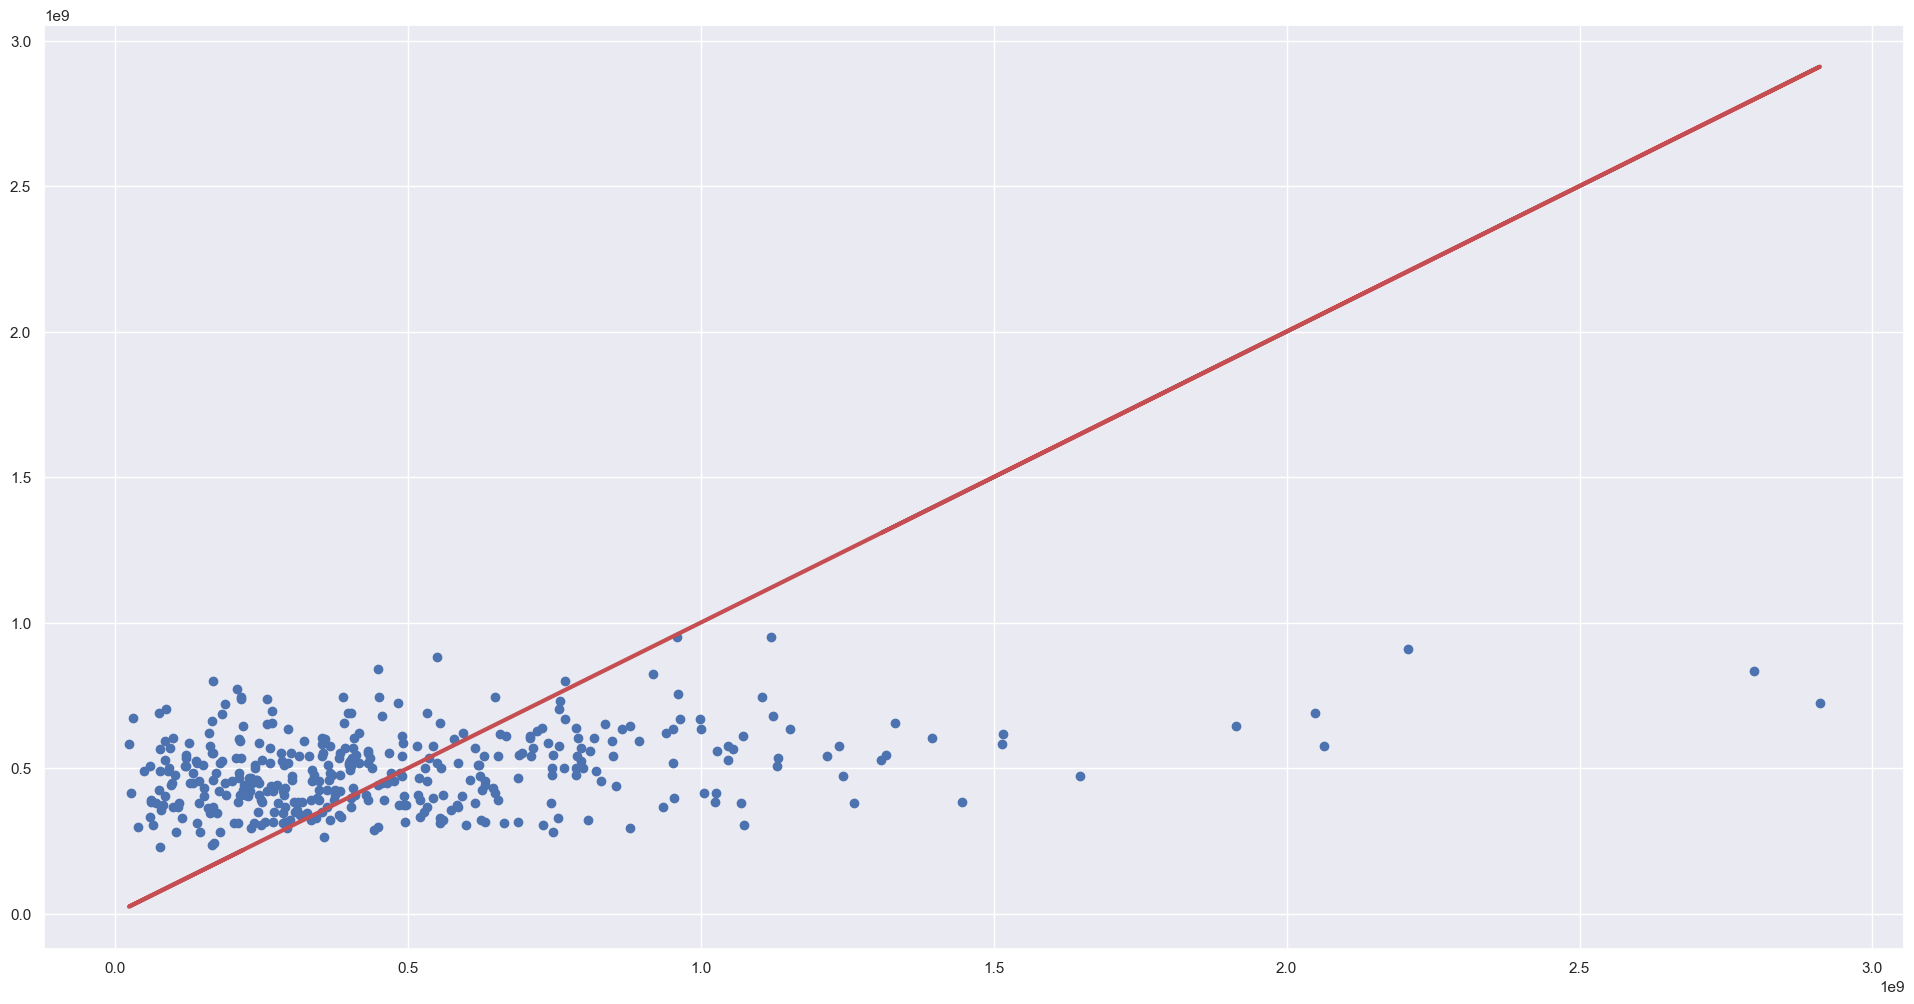

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def regression_func(predictor, response):
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size = 0.20)

    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Predict SalePrice values corresponding to predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Plot the regression line
    f = plt.figure(figsize=(24, 12))
    plt.scatter(y_train, y_train_pred, color = "b")
    plt.plot(y_train, y_train, 'r-', linewidth = 3)

regression_func(production_cost,worldwide_gross)
regression_func(runtime,worldwide_gross)

In [62]:
# function to test goodness of fit using the Test Set
def gof_func(predictor, response):
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(
        predictor, response, test_size=0.20
    )

    # Linear Regression using Train Data
    linreg = LinearRegression()  # create the linear regression object
    linreg.fit(X_train, y_train)  # train the linear regression model

    # Predict SalePrice values corresponding to predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Mean Squared Error (MSE)
    def mean_sq_err(actual, predicted):
        """Returns the Mean Squared Error of actual and predicted values"""
        return np.mean(np.square(np.array(actual) - np.array(predicted)))

    mse = mean_sq_err(y_test, y_test_pred)
    print("Mean Squared Error (MSE) \t:", mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

#compare the  three model----------------------------------------------------------------
print("production_cost vs. worldwide_gross")
gof_func(production_cost,worldwide_gross)
print("")
print("runtime vs. domestic_gross")
gof_func(runtime,worldwide_gross)
print("")

production_cost vs. worldwide_gross
Mean Squared Error (MSE) 	: 8.213759626727229e+16
Root Mean Squared Error (RMSE) 	: 286596574.06757724

runtime vs. domestic_gross
Mean Squared Error (MSE) 	: 1.960048105158828e+17
Root Mean Squared Error (RMSE) 	: 442724305.3141343



Lower: -409673899.625
Upper: 1289788817.375
Lower: 12500000.0
Upper: 272500000.0
Intercept of Regression 	: b =  [1.14824878e+08]
Coefficients of Regression 	: a =  [[0.06987531]]

Lower: -409673899.625
Upper: 1289788817.375
Lower: 57.5
Upper: 181.5
Intercept of Regression 	: b =  [112.42077341]
Coefficients of Regression 	: a =  [[1.74270408e-08]]



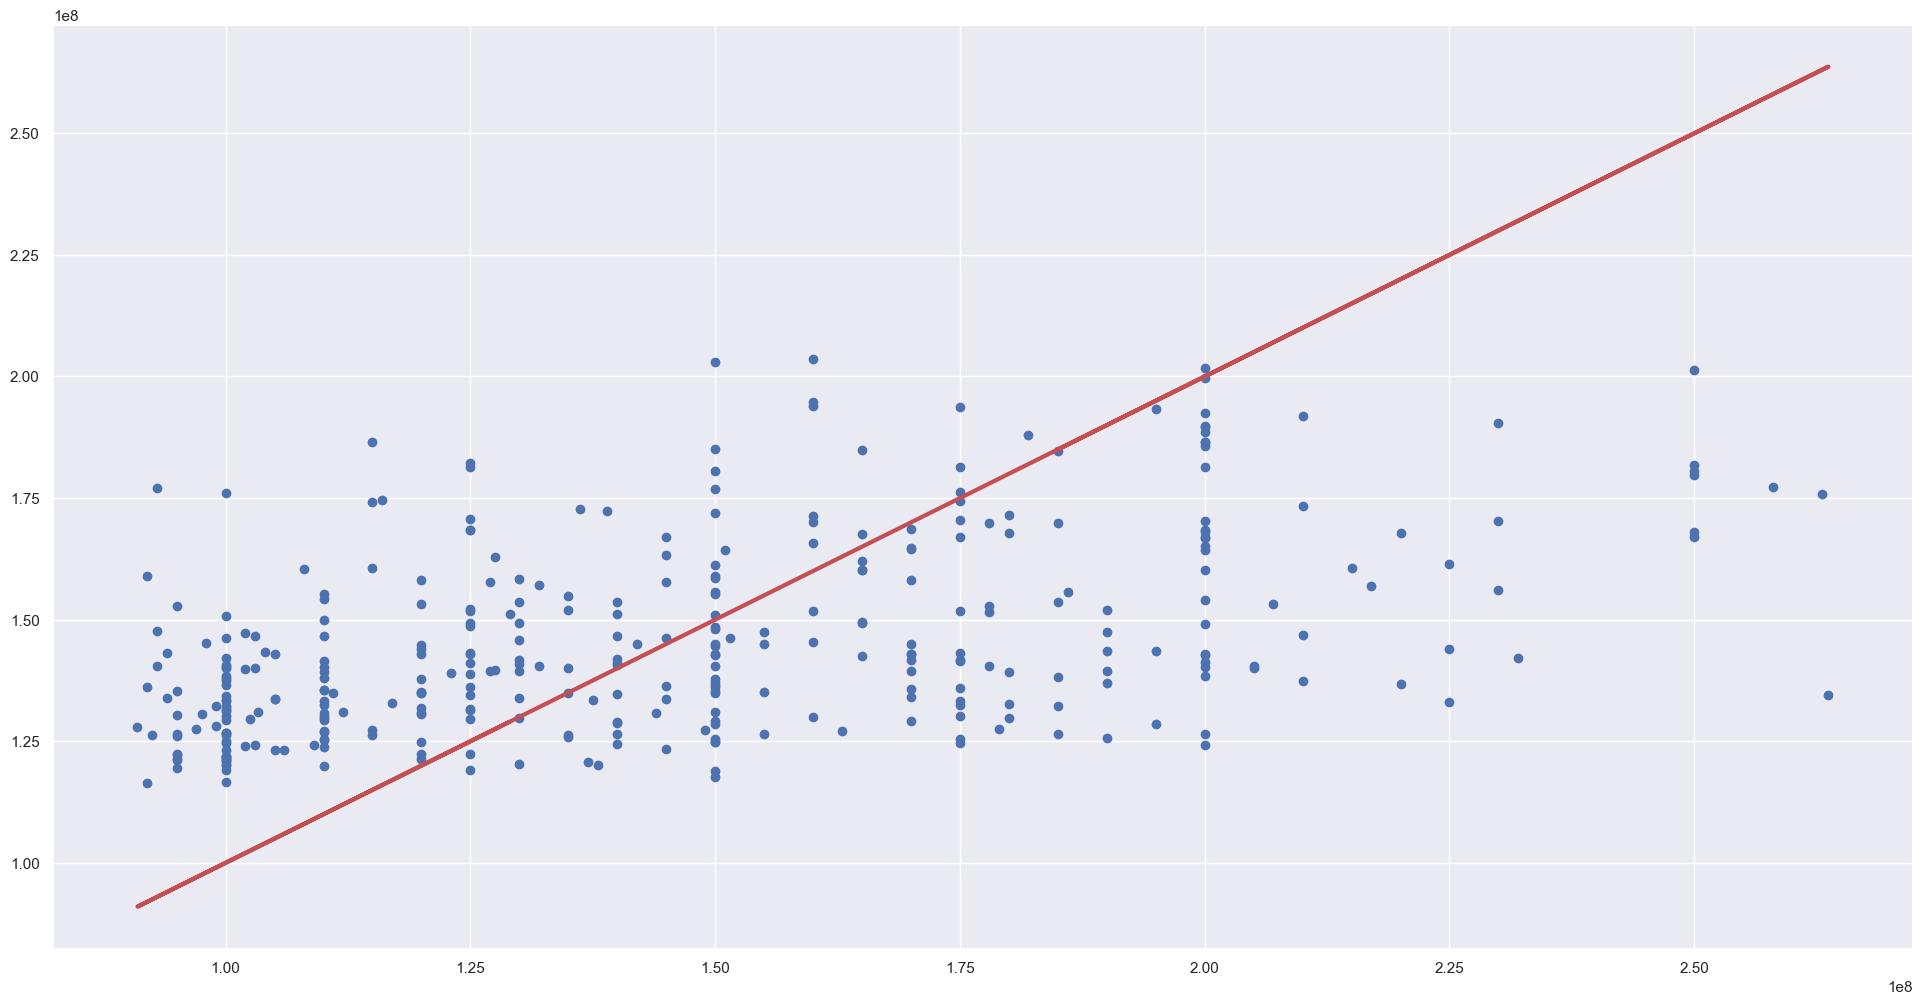

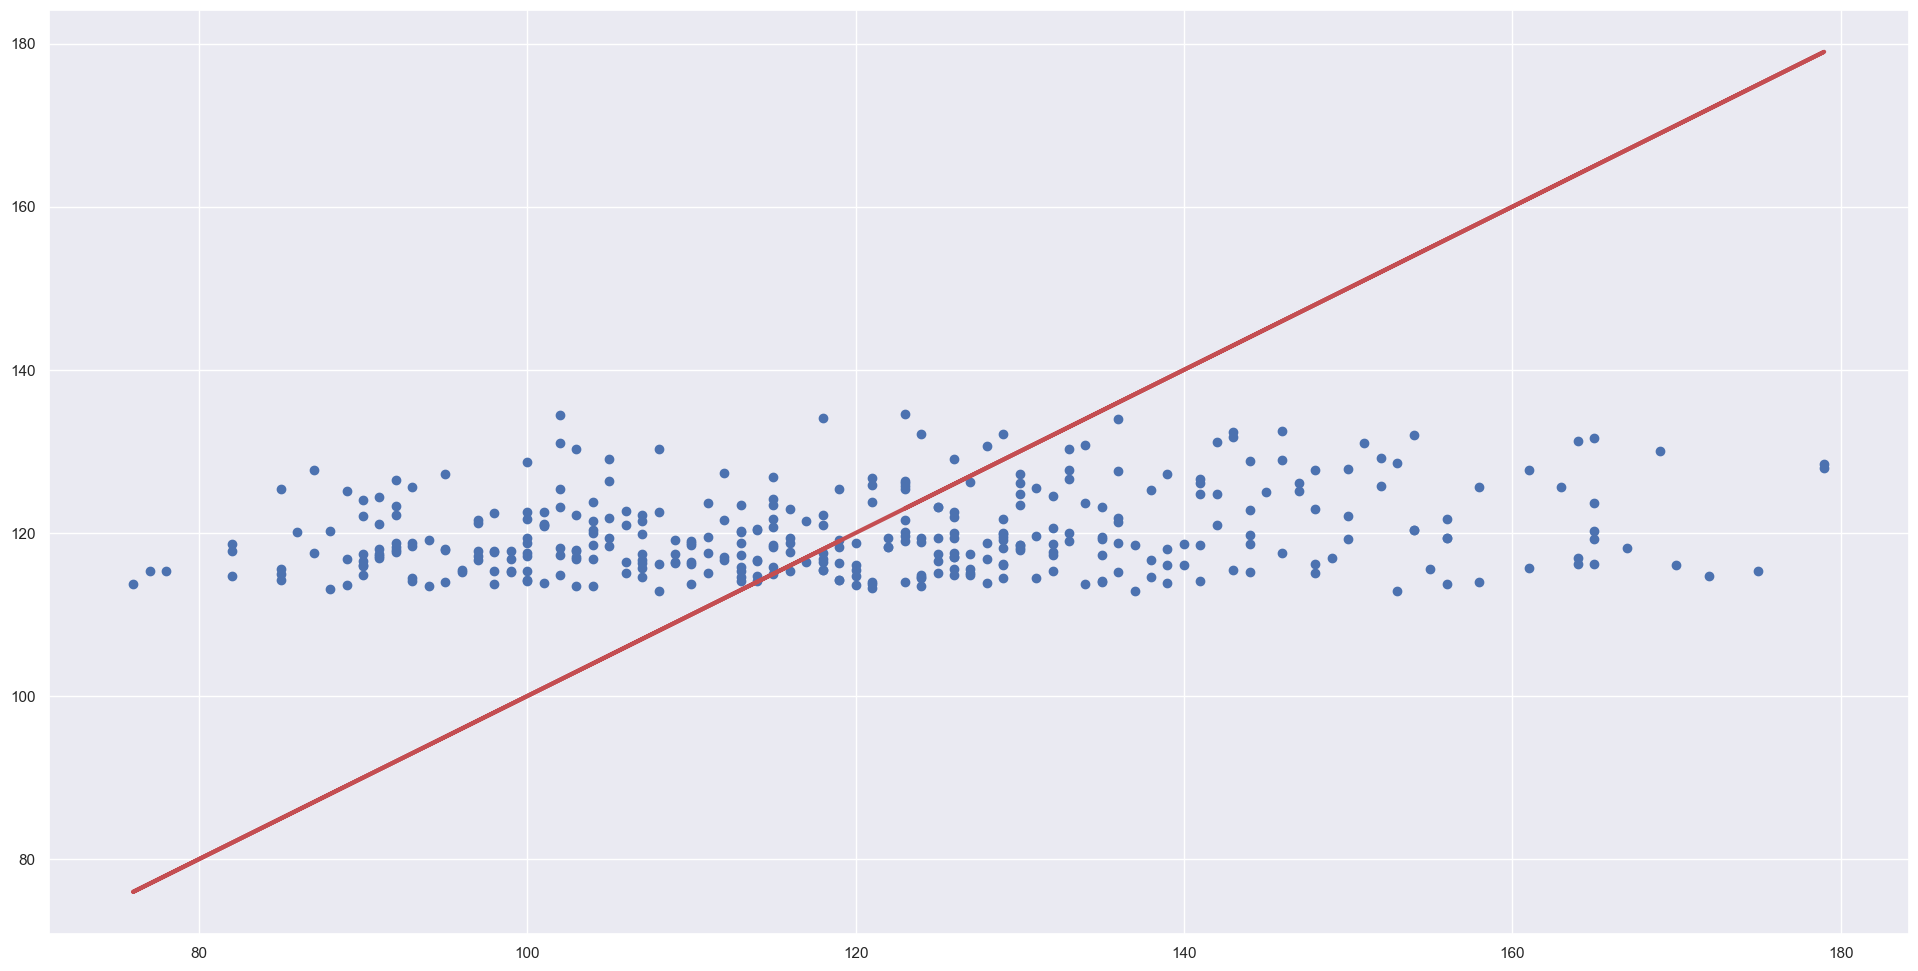

In [72]:
def FindOutlierBound(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    print("Lower:", q1 - 1.5 * iqr)
    print("Upper:", q3 + 1.5 * iqr)

FindOutlierBound(movieData, "worldwide_gross")
FindOutlierBound(movieData, "production_cost")

df_filtered = movieData[(movieData["worldwide_gross"] <= 1289788817.375) & (movieData["worldwide_gross"] >= -409673899.625) & (movieData["production_cost"] <= 272500000.0)& (movieData["production_cost"] >= 12500000.0)]

worldwide_gross_Cleaned = pd.DataFrame(df_filtered['worldwide_gross'])
production_cost_Cleaned = pd.DataFrame(df_filtered['production_cost'])

regression_func(worldwide_gross_Cleaned, production_cost_Cleaned)

FindOutlierBound(movieData, "worldwide_gross")
FindOutlierBound(movieData, "runtime")

df_filtered = movieData[(movieData["worldwide_gross"] <= 1289788817.375) & (movieData["worldwide_gross"] >= -409673899.625) & (movieData["runtime"] <= 181.5)& (movieData["runtime"] >= 57.5)]

worldwide_gross_Cleaned = pd.DataFrame(df_filtered['worldwide_gross'])
runtime_Cleaned = pd.DataFrame(df_filtered['runtime'])

regression_func(worldwide_gross_Cleaned, runtime_Cleaned)